In [44]:
!git clone https://github.com/akhilreddy3024/Health_Care.git

fatal: destination path 'Health_Care' already exists and is not an empty directory.


In [45]:
!ls

Health_Care  sample_data


In [46]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df=pd.read_csv('/content/Health_Care/public-health-laboratory-influenza-respiratory-virus-surveillance-data-by-region-and-influenza-season.csv')

In [48]:
df

,season,date_code,weekending,region,Influenza_Category,Count
0,2009-2010,200940,10/04/09,Bay Area,Influenza_A,56
1,2009-2010,200940,10/04/09,Bay Area,Influenza_AH3,0
2,2009-2010,200940,10/04/09,Bay Area,Influenza_AH1,0
3,2009-2010,200940,10/04/09,Bay Area,Influenza_AH1pdm09,0
4,2009-2010,200940,10/04/09,Bay Area,Influenza_ANotSubtyped,56
...,...,...,...,...,...,...
23827,2017-2018,201840,09/30/18,Upper Southern,Influenza_BVictoria,0
23828,2017-2018,201840,09/30/18,Upper Southern,Influenza_BYamagata,0
23829,2017-2018,201840,09/30/18,Upper Southern,Influenza_BNotLineageTyped,0
23830,2017-2018,201840,09/30/18,Upper Southern,Influenza_Total,0


In [49]:
region_df=df.groupby(['region'])['Count'].sum().reset_index()
region_df.head()

,region,Count
0,Bay Area,52887
1,California,216998
2,Central,32321
3,Lower Southern,78819
4,Northern,14625


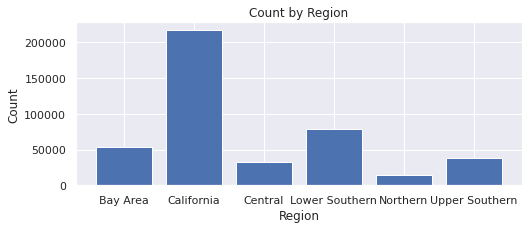

In [50]:
plt.figure(figsize=(8, 3))
plt.bar(region_df['region'], region_df['Count'])
plt.title("Count by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

In [51]:
agedf=pd.read_csv('/content/Health_Care/age and seasonal distribution.csv').drop('Season', axis = 'columns')
agedf.head()

,Age Group,A (H1),A (Unable to Subtype),A (H3),A (H1N1)pdm09,A (Subtyping not Performed),B (Victoria Lineage),B (Yamagata Lineage),B (Lineage Unspecified),H3N2v
0,0-4 yr,0,0,3,3,7,1,1,6,0
1,5-24 yr,0,0,8,3,24,6,5,18,1
2,25-64 yr,0,0,3,3,47,3,0,21,0
3,65+ yr,0,0,0,2,8,0,0,10,0


In [52]:
columnNames=['Virus','Count']
zerotofourdf = agedf[agedf["Age Group"] == "0-4 yr"].T.reset_index()
zerotofourdf.columns = columnNames
df1=zerotofourdf[(zerotofourdf.Virus != 'Age Group') & (zerotofourdf.Count != 0)]
Virus_List1 = list(df1["Virus"])

fiveto24 = agedf[agedf["Age Group"] == "5-24 yr"].T.reset_index()
fiveto24.columns = columnNames
df2=fiveto24[(fiveto24.Virus != 'Age Group') & (fiveto24.Count != 0)]
Virus_List2 = list(df2["Virus"])

twentyfiveto64 = agedf[agedf["Age Group"] == "25-64 yr"].T.reset_index()
twentyfiveto64.columns = columnNames
df3=twentyfiveto64[(twentyfiveto64.Virus != 'Age Group') & (twentyfiveto64.Count != 0)]
Virus_List3 = list(df3["Virus"])

sixtyfive = agedf[agedf["Age Group"] == "5-24 yr"].T.reset_index()
sixtyfive.columns = columnNames
df4=sixtyfive[(sixtyfive.Virus != 'Age Group') & (sixtyfive.Count != 0)]
Virus_List4 = list(df4["Virus"])

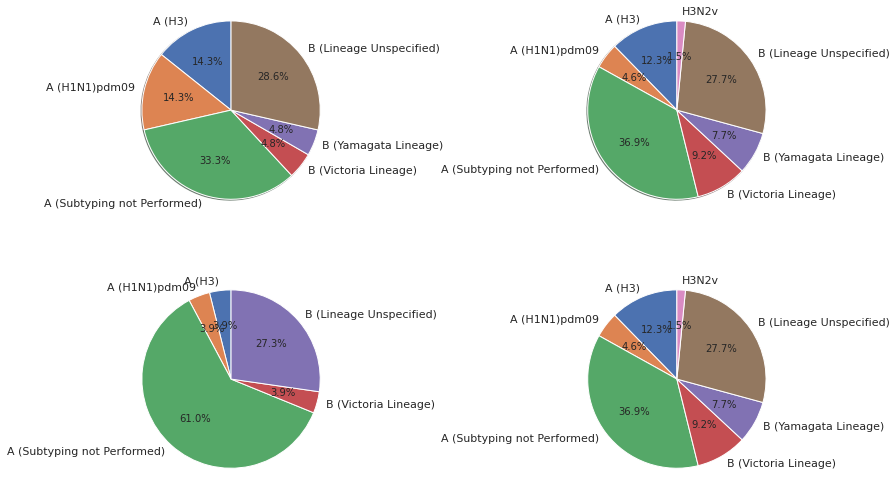

In [53]:
fig, ax = plt.subplots(2, 2)
#ax[0,0].title.set_text('First Plot')

ax[0,0].pie(df1['Count'], labels= Virus_List1, startangle=90, autopct='%.1f%%', shadow=True, radius=2)


ax[0,1].pie(df2['Count'], labels= Virus_List2, startangle=90, autopct='%.1f%%', shadow=True, radius=2)
ax[1,0].pie(df3['Count'], labels= Virus_List3, startangle=90, autopct='%.1f%%', radius=2)

ax[1,1].pie(df4['Count'], labels= Virus_List4, startangle=90, autopct='%.1f%%', radius=2)
plt.subplots_adjust(left=0.01,bottom=0.0001, right=1.3,top=1.5,wspace=3, hspace=0.65)
plt.show()

In [54]:
fludf=pd.read_csv('/content/Health_Care/FluSurveillance_FluSurv-NET_Entire Network_Data.csv')
#tips_df = sns.load_dataset(fludf)
fludf.head()

,CATCHMENT,NETWORK,SEASON,MMWR-YEAR,MMWR-WEEK,AGE CATEGORY,CUMULATIVE RATE,WEEKLY RATE
0,Entire Network,FluSurv-NET,2019-20,2019,40,0-4 yr,0.1,0.1
1,Entire Network,FluSurv-NET,2019-20,2019,41,0-4 yr,0.2,0.2
2,Entire Network,FluSurv-NET,2019-20,2019,42,0-4 yr,0.4,0.2
3,Entire Network,FluSurv-NET,2019-20,2019,43,0-4 yr,0.9,0.5
4,Entire Network,FluSurv-NET,2019-20,2019,44,0-4 yr,1.3,0.4


In [55]:
import seaborn as sns

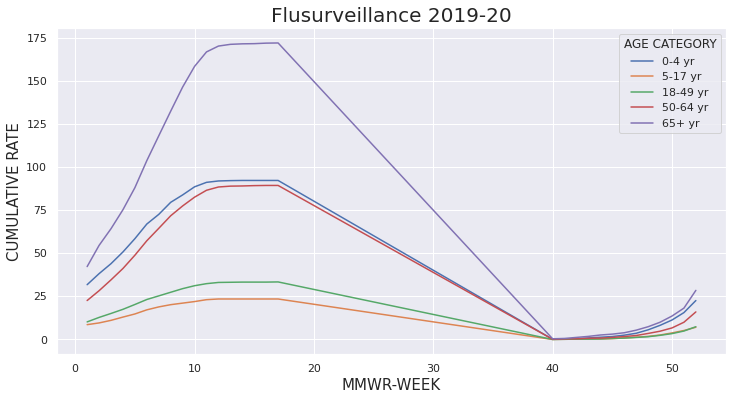

In [56]:
plt.figure(figsize = (12,6)) # figure size with ratio 16:9
sns.set(style='darkgrid',)

sns.lineplot(data=fludf, x="MMWR-WEEK", y="CUMULATIVE RATE", hue="AGE CATEGORY", style= "AGE CATEGORY", dashes = False, legend="auto")

plt.title("Flusurveillance 2019-20", fontsize = 20)
plt.xlabel("MMWR-WEEK", fontsize = 15)
plt.ylabel("CUMULATIVE RATE", fontsize = 15)
plt.show()
